<a href="https://colab.research.google.com/github/Chakkarapani/Tensorflow/blob/master/Basic_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import,print_function,division

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.13.1


In [0]:
#load dataset
fashion_data = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


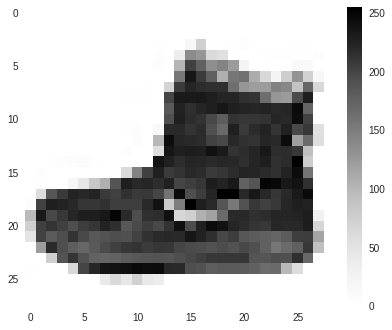

9


In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[0])

In [14]:
print(len(train_images))
print(len(test_images))

60000
10000


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

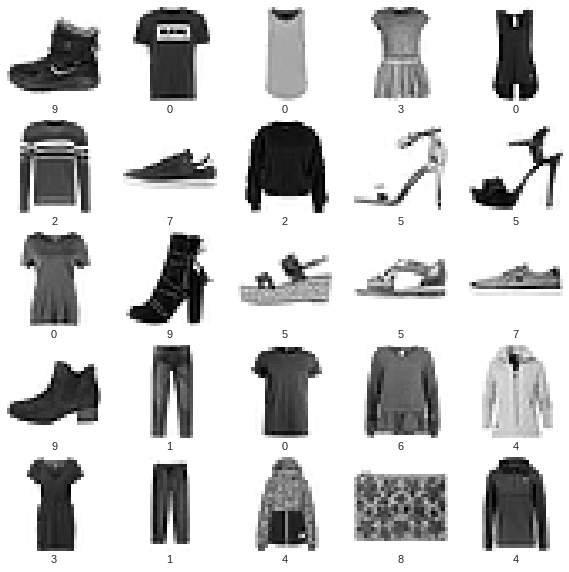

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [0]:
# Building the neural network requires configuring the layers of the model, then compiling the model.

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Compile the model

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.4971 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3724 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3346 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3088 - acc: 0.8867
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2933 - acc: 0.8918


In [26]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3598 - acc: 0.8708


In [27]:
print('Test accuracy:', test_accuracy)

Test accuracy: 0.8708


In [0]:
predictions = model.predict(test_images)

In [29]:
predictions.shape

(10000, 10)

In [30]:
predictions[0]

array([4.9539785e-06, 3.2996471e-07, 2.9173793e-07, 5.8116946e-08,
       1.3723753e-05, 8.6051360e-02, 9.6450924e-07, 1.2880924e-01,
       3.1887263e-05, 7.8508717e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
train_labels[0]

9

In [0]:
# Predict single images on the model
img = test_images[0]

In [34]:
img.shape

(28, 28)

In [0]:
img = np.expand_dims(img,0)

In [36]:
img.shape

(1, 28, 28)

In [37]:
model.predict(img)

array([[4.9539822e-06, 3.2996530e-07, 2.9173759e-07, 5.8116935e-08,
        1.3723777e-05, 8.6051404e-02, 9.6451106e-07, 1.2880933e-01,
        3.1887288e-05, 7.8508705e-01]], dtype=float32)

In [38]:
np.argmax(model.predict(img))

9